In [3]:
import pandas as pd
from pathlib import Path
# from euroclear.config import RAW_DATA_DIR
from ydata_profiling import ProfileReport
import pycountry

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet('../data/raw/accounts/part-00000-af066738-0f3b-45e4-a08f-6d7ed4f84424-c000.snappy.parquet')

In [5]:
df_w = pd.read_parquet('../data/raw/world_data/part-00000-1ffc4f17-2dd5-4f08-94aa-313697ef63d2-c000.snappy.parquet')

In [6]:
df_w

,country,country_code,currency_name,currency_code,country_risk
0,Afghanistan,AF,Afghani,AFN,7
1,Albania,AL,Lek,ALL,4
2,Algeria,DZ,Algerian Dinar,DZD,5
3,Andorra,AD,Euros,EUR,1
4,Angola,AO,Angolan kwanza,AOA,6
...,...,...,...,...,...
181,Venezuela,VE,Bolivar,VEF,7
182,Vietnam,VN,Dong,VND,4
183,Yemen,YE,Rial,YER,7
184,Zambia,ZM,Kwacha,ZMK,7


In [7]:
df

,account_id,company_name,address,country
0,844,Stark-Wilkinson,"11959 Andrew Mills,North Raleigh",Afghanistan
1,720,"Spencer, Vandervort and Jacobs","28934 Schaden Locks,Desiraetown",Afghanistan
2,49,Ziemann-Lowe,"09596 Jesus Mission,South Sana",Afghanistan
3,39,"O'Hara, MacGyver and Ratke","176 Everett Radial,North Ulysses",Afghanistan
4,864,Jakubowski Inc,"395 Smith Course,South Blaketon",Albania
...,...,...,...,...
995,2,Kassulke-Breitenberg,"5440 Prosacco Hollow,Renatoberg",Zambia
996,528,Senger Inc,"71666 Lon Streets,Janellaton",Zimbabwe
997,494,Brown-Mueller,"750 Wehner Trace,Benview",Zimbabwe
998,489,Gutmann-Wisozk,"1088 Lebsack Vista,Richiefort",Zimbabwe


In [8]:
df_all = df.merge(df_w, how='left' ,on='country') 

In [9]:
df_all

,account_id,company_name,address,country,country_code,currency_name,currency_code,country_risk
0,844,Stark-Wilkinson,"11959 Andrew Mills,North Raleigh",Afghanistan,AF,Afghani,AFN,7
1,720,"Spencer, Vandervort and Jacobs","28934 Schaden Locks,Desiraetown",Afghanistan,AF,Afghani,AFN,7
2,49,Ziemann-Lowe,"09596 Jesus Mission,South Sana",Afghanistan,AF,Afghani,AFN,7
3,39,"O'Hara, MacGyver and Ratke","176 Everett Radial,North Ulysses",Afghanistan,AF,Afghani,AFN,7
4,864,Jakubowski Inc,"395 Smith Course,South Blaketon",Albania,AL,Lek,ALL,4
...,...,...,...,...,...,...,...,...
995,2,Kassulke-Breitenberg,"5440 Prosacco Hollow,Renatoberg",Zambia,ZM,Kwacha,ZMK,7
996,528,Senger Inc,"71666 Lon Streets,Janellaton",Zimbabwe,ZW,Zimbabwe Dollar,ZWD,7
997,494,Brown-Mueller,"750 Wehner Trace,Benview",Zimbabwe,ZW,Zimbabwe Dollar,ZWD,7
998,489,Gutmann-Wisozk,"1088 Lebsack Vista,Richiefort",Zimbabwe,ZW,Zimbabwe Dollar,ZWD,7


In [11]:
risk_counts = df_all.groupby('country_risk')['account_id'].count().reset_index(name='num_companies')

In [12]:
risk_counts

,country_risk,num_companies
0,1,285
1,2,37
2,3,75
3,4,75
4,5,73
5,6,148
6,7,307


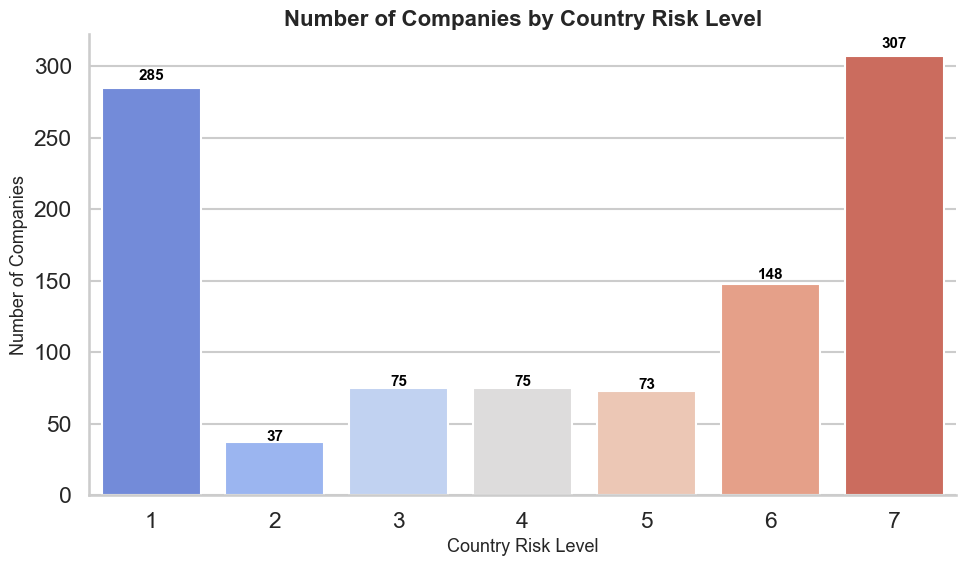

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(
    data=risk_counts,
    x='country_risk',
    y='num_companies',
    hue='country_risk',
    palette='coolwarm',
    legend=False,
    ax=ax
)

for i, row in risk_counts.iterrows():
    ax.text(
        x=i,
        y=row['num_companies'] + (row['num_companies'] * 0.02),
        s=f"{row['num_companies']:,}",
        ha='center',
        fontsize=11,
        fontweight='semibold',
        color='black'
    )

ax.set_title('Number of Companies by Country Risk Level', fontsize=16, fontweight='bold')
ax.set_xlabel('Country Risk Level', fontsize=13)
ax.set_ylabel('Number of Companies', fontsize=13)

sns.despine(top=True, right=True)
plt.tight_layout()
plt.show()



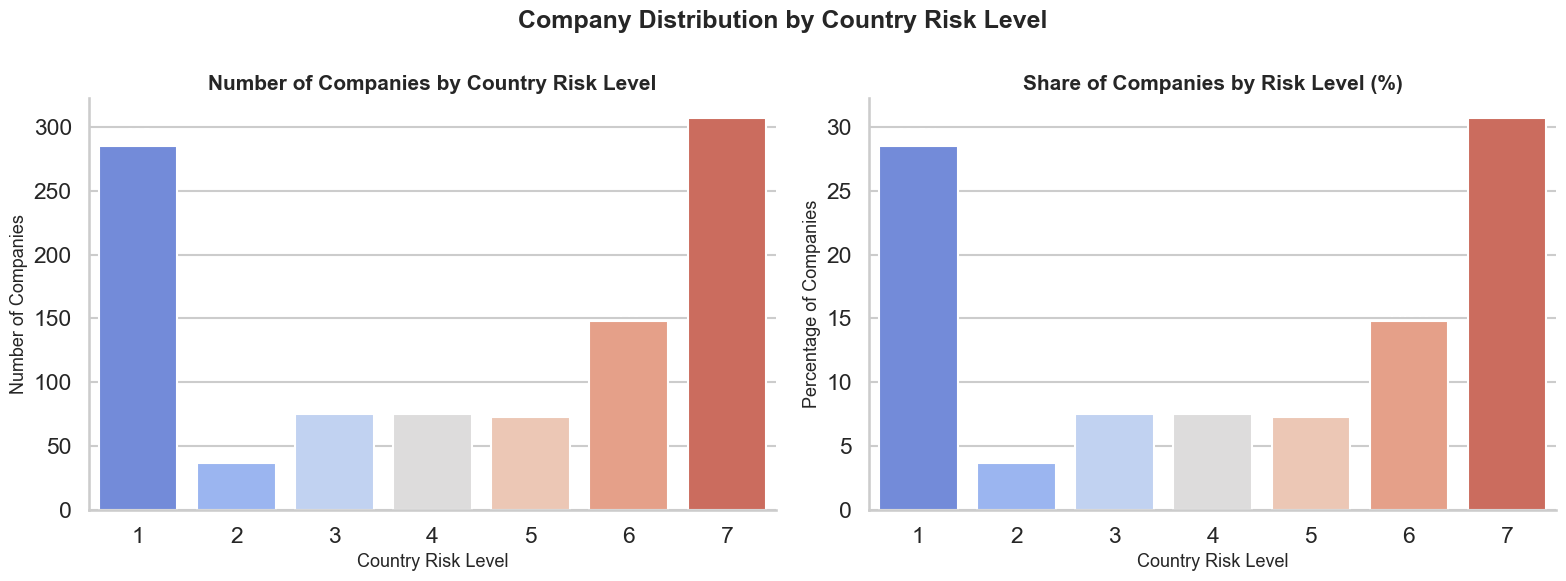

In [17]:
risk_counts["percentage"] = (
    risk_counts["num_companies"] / risk_counts["num_companies"].sum() * 100
)


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)

sns.barplot(
    data=risk_counts,
    x="country_risk",
    y="num_companies",
    hue="country_risk",
    palette="coolwarm",
    legend=False,
    ax=axes[0]
)

for i, row in risk_counts.iterrows():
    axes[0].text(
        x=i,
        y=row["num_companies"] + (row["num_companies"] * 0.02),
        s=f"{row['num_companies']:,}",
        ha="center",
        fontsize=11,
        fontweight="semibold",
        color="white",
    )

axes[0].set_title("Number of Companies by Country Risk Level", fontsize=15, fontweight="bold")
axes[0].set_xlabel("Country Risk Level", fontsize=13)
axes[0].set_ylabel("Number of Companies", fontsize=13)
sns.despine(ax=axes[0], top=True, right=True)



sns.barplot(
    data=risk_counts,
    x="country_risk",
    y="percentage",
    hue="country_risk",
    palette="coolwarm",
    legend=False,
    ax=axes[1]
)

for i, row in risk_counts.iterrows():
    axes[1].text(
        x=i,
        y=row["percentage"] + (row["percentage"] * 0.02),
        s=f"{row['percentage']:.1f}%",
        ha="center",
        fontsize=11,
        fontweight="semibold",
        color="white",
    )

axes[1].set_title("Share of Companies by Risk Level (%)", fontsize=15, fontweight="bold")
axes[1].set_xlabel("Country Risk Level", fontsize=13)
axes[1].set_ylabel("Percentage of Companies", fontsize=13)
sns.despine(ax=axes[1], top=True, right=True)


fig.suptitle("Company Distribution by Country Risk Level", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()


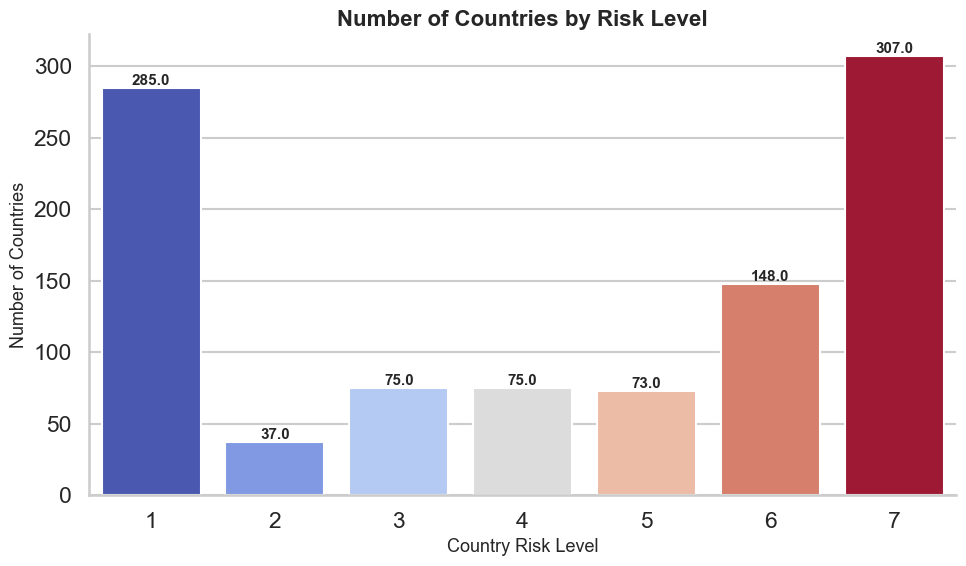